In [55]:
import pathlib as pl
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread_collection
from nuclei_segmentation import all_functions, metrics, visualisation
import pandas as pd
import json

## Cell nuclei counting

### Results

The cell nuclei counting algorithm was tested on the ground truth images from N2DH-GOWT1 and N2DL-HeLa datasets. The single cell nuclei in the ground truth images in these datasets have different intensities. Therefore it is possible to extract the ground truth number of cell nuclei from the images.

The results are presented in the following tables.

In [56]:
with open(str(pl.Path('Results/cell_counting_results.json')), "r") as file:
    cell_counting_results = json.load(file)
    
table_GOWT1 = pd.DataFrame.from_dict(cell_counting_results["N2DH-GOWT1"])
table_GOWT1 = table_GOWT1.set_axis(["man_seg01.tif", "man_seg21.tif", "man_seg31.tif", 
                                    "man_seg39.tif", "man_seg52.tif", "man_seg72.tif"], axis = 0)
table_GOWT1.style.set_caption('Table 1: Results of the cell counting on the N2DH-GOWT1 dataset.')

,Calculated number,Ground truth number,Absolute difference,Relative difference
man_seg01.tif,24,23,1,0.043478
man_seg21.tif,23,24,-1,-0.041667
man_seg31.tif,24,22,2,0.090909
man_seg39.tif,23,25,-2,-0.080000
man_seg52.tif,30,30,0,0.000000
man_seg72.tif,28,28,0,0.000000


In [57]:
table_HeLa = pd.DataFrame.from_dict(cell_counting_results["N2DL-HeLa"])
table_HeLa = table_HeLa.set_axis(["man_seg13.tif", "man_seg52.tif", "man_seg75.tif", "man_seg79.tif"], axis = 0)
table_HeLa.style.set_caption('Table 2: Results of the cell counting on the N2DL-HeLa dataset.')

,Calculated number,Ground truth number,Absolute difference,Relative difference
man_seg13.tif,58,59,-1,-0.016949
man_seg52.tif,107,109,-2,-0.018349
man_seg75.tif,365,349,16,0.045845
man_seg79.tif,329,342,-13,-0.038012


In [58]:
mean_error = np.abs(np.mean(cell_counting_results["N2DL-HeLa"]["Relative difference"] 
                            + cell_counting_results["N2DH-GOWT1"]["Relative difference"]))
standard_deviation =np.abs(np.std(cell_counting_results["N2DL-HeLa"]["Relative difference"] 
                                  + cell_counting_results["N2DH-GOWT1"]["Relative difference"]))
print("Relative error (datasets combined): {} +/- {}".format(mean_error, standard_deviation))

Relative error (datasets combined): 0.001474351498372345 +/- 0.04737068686901992


In [59]:
######### DELETE ##########
col_gt_img_HeLa = imread_collection(str(pl.Path('Data/N2DL-HeLa/gt/*.tif')))
col_gt_img_GOWT1 = imread_collection(str(pl.Path('Data/N2DH-GOWT1/gt/*.tif')))

### Discussion

Our algorithm could correctly calculate the cell nuclei number in only 2 of 10 images. The relative error did not exceed 10% and 5% when applied to the N2DH-GOWT1 and on the N2DL-HeLa datasets respectivly. By analyzing the images we determined the possible causes of the errors.

Firstly, some images contain touching cell nuclei as shown in the following figure.

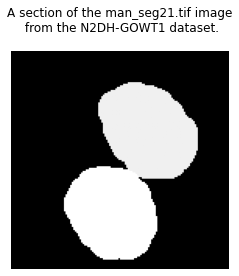

In [60]:
plt.imshow(col_gt_img_GOWT1[1][660:800, 800:940], 'gray')
plt.axis("off")
plt.title("A section of the man_seg21.tif image\n from the N2DH-GOWT1 dataset.", pad = 20);

The two cell nuclei have a common border in this case, therefore our algorithm detects only one cell.

In other cases there are small black regions inside the cell nuclei, as shown in the following figure.

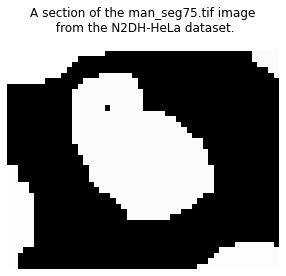

In [61]:
plt.imshow(col_gt_img_HeLa[2][620:660, 1020:1070], 'gray')
plt.axis("off")
plt.title("A section of the man_seg75.tif image\n from the N2DH-HeLa dataset.", pad = 20);

In this case our algorithm would detect not only the border around the cell, but also the border around the black pixel inside the cell. Since these two borders do not touch, they would be assigned to two different groups and therefore counted as two cell nuclei.